In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
# Import Training and Testing data

training_df = pd.read_csv(r"D:\Ashraf\NCI\Semester 2\DAPA\Dataset\twitter_training.csv")

testing_df = pd.read_csv(r"D:\Ashraf\NCI\Semester 2\DAPA\Dataset\twitter_validation.csv")

In [3]:
training_df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [4]:
# Assign header to columns

column = ['ID','Game','Sentiment','Tweet']

training_df.columns = column
testing_df.columns = column

In [5]:
training_df.head(10)

,ID,Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [6]:
# Drop 'ID' column

training_df.drop(columns=['ID'], inplace=True)
testing_df.drop(columns=['ID'], inplace=True)

training_df.head(5)

,Game,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# Check null values in training dataset

training_df.isnull().sum()

Game           0
Sentiment      0
Tweet        686
dtype: int64

In [8]:
# Check null values in testing dataset

testing_df.isnull().sum()

Game         0
Sentiment    0
Tweet        0
dtype: int64

In [9]:
# Drop null values

training_df.dropna(inplace=True)

training_df.isnull().sum()

Game         0
Sentiment    0
Tweet        0
dtype: int64

In [10]:
# Check duplicate rows in training dataset

training_df.duplicated().sum()

3038

In [11]:
testing_df.duplicated().sum()

0

In [12]:
# Remove duplicate rows

training_df.drop_duplicates(inplace=True)

training_df.shape

(70957, 3)

In [13]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Preprocessing

In [14]:
import re
import emoji
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags but keep the text
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stop words and apply stemming
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    
    # Handle emojis
    text = emoji.demojize(text)
    
    return text

training_df['Tweet'] = training_df['Tweet'].apply(preprocess_text)
testing_df['Tweet'] = testing_df['Tweet'].apply(preprocess_text)


In [15]:
# Encode textual data to numerical data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
training_df['Sentiment'] = label_encoder.fit_transform(training_df['Sentiment'])
testing_df['Sentiment'] = label_encoder.transform(testing_df['Sentiment'])

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000

# Define the tokenizer and fit on the training data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(training_df['Tweet'])

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(training_df['Tweet'])
X_test = tokenizer.texts_to_sequences(testing_df['Tweet'])

# Padding sequences to ensure uniform length
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = training_df['Sentiment']
y_test = testing_df['Sentiment']

In [17]:
unique_labels = training_df['Sentiment'].unique()
print("Unique sentiment labels:", unique_labels)

Unique sentiment labels: [3 2 1 0]


# Modelling

# LSTM Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding

embedding_dim = 100

# Define the model parameters
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=128, dropout=0.2, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(len(unique_labels), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 258s 143ms/step - accuracy: 0.5176 - loss: 1.1071 - val_accuracy: 0.5030 - val_loss: 1.3079
Epoch 2/5
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 249s 135ms/step - accuracy: 0.7510 - loss: 0.6509 - val_accuracy: 0.4658 - val_loss: 1.6255
Epoch 3/5
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 251s 141ms/step - accuracy: 0.8225 - loss: 0.4704 - val_accuracy: 0.4341 - val_loss: 1.9697
Epoch 4/5
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 253s 143ms/step - accuracy: 0.8537 - loss: 0.3851 - val_accuracy: 0.4534 - val_loss: 2.0753
Epoch 5/5
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 290s 164ms/step - accuracy: 0.8802 - loss: 0.3133 - val_accuracy: 0.4497 - val_loss: 2.2737


In [19]:
# Evaluation of LSTM Model

loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8177 - loss: 0.7438
Test Loss: 0.7363728880882263
Test Accuracy: 0.8218218088150024


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prediction
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test

print(classification_report(y_test, y_pred_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       171
           1       0.82      0.86      0.84       266
           2       0.85      0.80      0.83       285
           3       0.85      0.82      0.83       277

    accuracy                           0.82       999
   macro avg       0.82      0.82      0.82       999
weighted avg       0.82      0.82      0.82       999



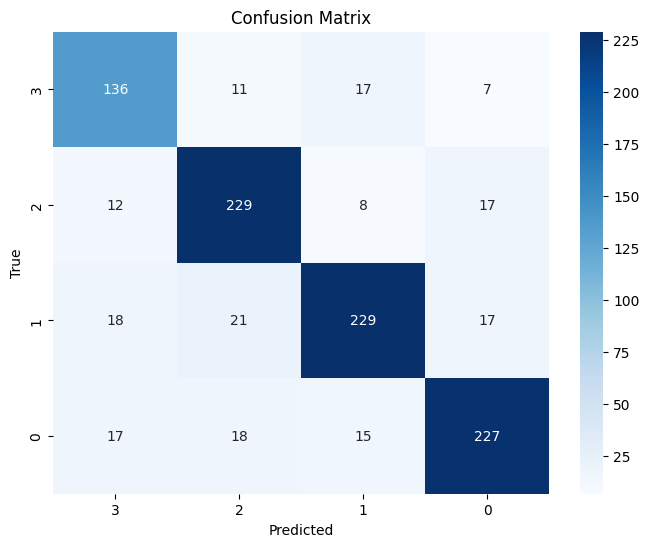

In [21]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"Training accuracy: {train_accuracy[-1]}")
print(f"Validation accuracy: {val_accuracy[-1]}")
print(f"Training loss: {train_loss[-1]}")
print(f"Validation loss: {val_loss[-1]}")

Training accuracy: 0.8747115135192871
Validation accuracy: 0.44968995451927185
Training loss: 0.3268372118473053
Validation loss: 2.273669719696045


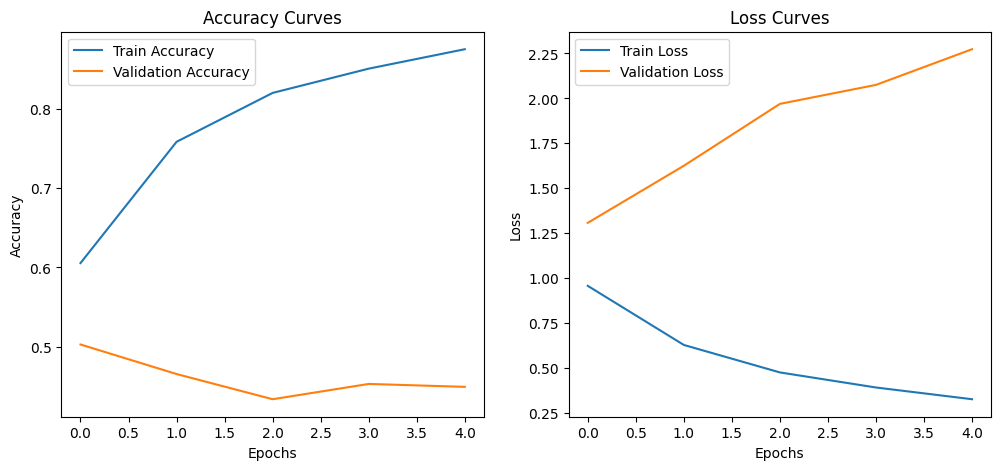

In [23]:
# Accuracy and Loss Cruves visualization

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()


In [24]:
model.save('Twitter_Sentiment_LSTM_Model.h5')

# BERT Model

In [33]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_data(texts, labels, max_len=128):
    encoded = tokenizer(
        texts.tolist(),
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return encoded['input_ids'], encoded['attention_mask'], tf.convert_to_tensor(labels)

# Assuming training_df and testing_df are defined
X_train_ids, X_train_mask, y_train = encode_data(training_df['Tweet'], training_df['Sentiment'])
X_test_ids, X_test_mask, y_test = encode_data(testing_df['Tweet'], testing_df['Sentiment'])

# Define a custom layer to handle BERT
class BertLayer(Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained('bert-base-uncased')

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.pooler_output

In [34]:
# Model Building
input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')

bert_output = BertLayer()([input_ids, attention_mask])

dense = Dense(128, activation='relu')(bert_output)
output = Dense(len(pd.unique(training_df['Sentiment'])), activation='softmax')(dense)

model_bert = Model(inputs=[input_ids, attention_mask], outputs=output)

model_bert.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Prepare datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_train_ids, 'attention_mask': X_train_mask}, y_train)).shuffle(100).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_test_ids, 'attention_mask': X_test_mask}, y_test)).batch(32)

# Train the model
history_bert = model_bert.fit(train_dataset, epochs=3, validation_data=test_dataset)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions 

Epoch 1/3
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 10895s 5s/step - accuracy: 0.3265 - loss: 1.3629 - val_accuracy: 0.2663 - val_loss: 1.3807
Epoch 2/3
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 8006s 4s/step - accuracy: 0.2786 - loss: 1.3757 - val_accuracy: 0.2663 - val_loss: 1.3793
Epoch 3/3
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 8006s 4s/step - accuracy: 0.2785 - loss: 1.3757 - val_accuracy: 0.2663 - val_loss: 1.3793


In [35]:
# # Saving BERT Model

# model_bert.save('Twitter_Sentiment_BERT_Model.h5')

In [36]:
# Evaluate Accuracy and Loss for BERT Model

bert_loss, bert_accuracy = model_bert.evaluate(test_dataset)
print(f"Test Loss: {bert_loss}")
print(f"Test Accuracy: {bert_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 157s 5s/step - accuracy: 0.2771 - loss: 1.3709
Test Loss: 1.3793056011199951
Test Accuracy: 0.26626625657081604


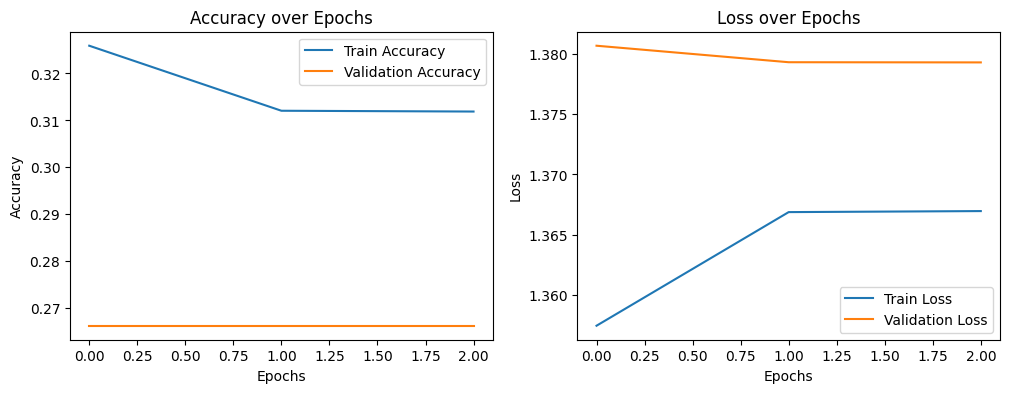

In [39]:


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_bert.history['accuracy'], label='Train Accuracy')
plt.plot(history_bert.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_bert.history['loss'], label='Train Loss')
plt.plot(history_bert.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
# Generate predictions
y_pred_bert = model_bert.predict(test_dataset)
y_pred_labels_bert = np.argmax(y_pred_bert, axis=1)

# Classification report
print(classification_report(y_test, y_pred_labels_bert))

32/32 ━━━━━━━━━━━━━━━━━━━━ 159s 5s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.27      1.00      0.42       266
           2       0.00      0.00      0.00       285
           3       0.00      0.00      0.00       277

    accuracy                           0.27       999
   macro avg       0.07      0.25      0.11       999
weighted avg       0.07      0.27      0.11       999



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# BERT Model 2

In [37]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_data(texts, labels, max_len=128):
    encoded = tokenizer(
        texts.tolist(),
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return encoded['input_ids'], encoded['attention_mask'], tf.convert_to_tensor(labels)

# Assuming training_df and testing_df are defined
X_train_ids, X_train_mask, y_train = encode_data(training_df['Tweet'], training_df['Sentiment'])
X_test_ids, X_test_mask, y_test = encode_data(testing_df['Tweet'], testing_df['Sentiment'])

# Define a custom layer to handle BERT
class BertLayer(Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained('bert-base-uncased')

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.pooler_output

# Model Building
input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')

bert_output = BertLayer()([input_ids, attention_mask])

# Adding dropout for regularization
dropout = Dropout(0.3)(bert_output)
dense = Dense(128, activation='relu')(dropout)
output = Dense(len(pd.unique(training_df['Sentiment'])), activation='softmax')(dense)

model_bert_2 = Model(inputs=[input_ids, attention_mask], outputs=output)

# Use a lower learning rate
optimizer_2 = tf.keras.optimizers.Adam(learning_rate=2e-5)
model_bert_2.compile(optimizer=optimizer_2, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Prepare datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_train_ids, 'attention_mask': X_train_mask}, y_train)).shuffle(1000).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': X_test_ids, 'attention_mask': X_test_mask}, y_test)).batch(32)

# Train the model for more epochs
history_bert_2 = model_bert_2.fit(train_dataset, epochs=5, validation_data=test_dataset)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 8100s 4s/step - accuracy: 0.3294 - loss: 1.3974 - val_accuracy: 0.3043 - val_loss: 1.4322
Epoch 2/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 8936s 4s/step - accuracy: 0.3349 - loss: 1.3677 - val_accuracy: 0.3043 - val_loss: 1.3833
Epoch 3/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 7942s 4s/step - accuracy: 0.3232 - loss: 1.3677 - val_accuracy: 0.3033 - val_loss: 1.3728
Epoch 4/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 8489s 4s/step - accuracy: 0.3219 - loss: 1.3668 - val_accuracy: 0.3383 - val_loss: 1.3682
Epoch 5/5
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 9300s 4s/step - accuracy: 0.3180 - loss: 1.3670 - val_accuracy: 0.3013 - val_loss: 1.3807


In [38]:
bert_loss_2, bert_accuracy_2 = model_bert_2.evaluate(test_dataset)
print(f"Test Loss: {bert_loss}")
print(f"Test Accuracy: {bert_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 192s 6s/step - accuracy: 0.2989 - loss: 1.3706
Test Loss: 1.3793056011199951
Test Accuracy: 0.26626625657081604


In [43]:
# Generate predictions
y_pred_bert_2 = model_bert_2.predict(test_dataset)
y_pred_labels_bert_2 = np.argmax(y_pred_bert_2, axis=1)

# Classification report
print(classification_report(y_test, y_pred_labels_bert_2))

32/32 ━━━━━━━━━━━━━━━━━━━━ 123s 4s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.27      0.73      0.40       266
           2       0.37      0.29      0.33       285
           3       0.38      0.09      0.15       277

    accuracy                           0.30       999
   macro avg       0.26      0.28      0.22       999
weighted avg       0.29      0.30      0.24       999



c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

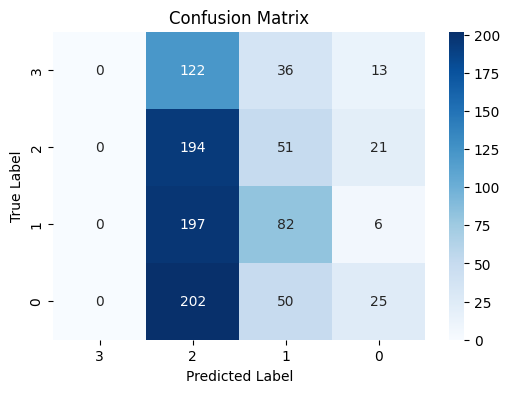

In [44]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels_bert_2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(training_df['Sentiment']), yticklabels=pd.unique(training_df['Sentiment']))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()